<h1>Lab 1: Basic Digital Signal Processing</h1>

# Initialization

In [156]:
import numpy as np
import scipy as sp
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
import cmath

# Exercise 1. *Implement the FFT and the IFFT*

We start by defining recursively the Fast Fourier Transform (FFT) following the given pseudocode

In [157]:
def Recursive_FFT(a):
    n = len(a)
    if n == 1:
        return a  # Base case
    wn = cmath.exp(-2j*cmath.pi/n)
    w = 1
    a_even = a[::2]
    a_odd = a[1::2]
    y_even = Recursive_FFT(a_even)
    y_odd = Recursive_FFT(a_odd)
    y = [0]*n
    for k in range(n//2):
        y[k] = y_even[k] + w*y_odd[k]
        y[k + n//2] = y_even[k] - w*y_odd[k]
        w *= wn
    return y

Let's test if the defined recursive function obtains the same results as the already implemented FFT function in Python scipy library

In [158]:
from scipy.fft import fft, ifft

test = np.arange(16)
TEST_scipy = fft(test)
print(TEST_scipy)

[120. -0.j          -8.+40.21871594j  -8.+19.3137085j   -8.+11.9728461j
  -8. +8.j          -8. +5.3454291j   -8. +3.3137085j   -8. +1.59129894j
  -8. -0.j          -8. -1.59129894j  -8. -3.3137085j   -8. -5.3454291j
  -8. -8.j          -8.-11.9728461j   -8.-19.3137085j   -8.-40.21871594j]


In [159]:
test = np.arange(16)
TEST_recursive = Recursive_FFT(test)
print(TEST_recursive)

[120, (-8+40.21871593700678j), (-8.000000000000002+19.31370849898476j), (-8.000000000000005+11.972846101323913j), (-7.999999999999999+8j), (-7.999999999999998+5.345429103354391j), (-7.999999999999997+3.3137084989847594j), (-7.999999999999996+1.5912989390372658j), -8, (-8-1.5912989390372623j), (-8.000000000000002-3.313708498984761j), (-8.000000000000002-5.345429103354395j), (-8-8j), (-8-11.97284610132391j), (-7.999999999999999-19.31370849898476j), (-7.999999999999996-40.218715937006785j)]


In [160]:
np.linalg.norm(TEST_scipy - TEST_recursive)

1.2962537282957974e-14

In [161]:
def Recursive_IFFT(y):
    n = len(y)
    if n == 1:
        return y
    wn = cmath.exp(2j*cmath.pi/n)
    w = 1
    y_even = Recursive_IFFT(y[::2])
    y_odd = Recursive_IFFT(y[1::2])
    a = [0]*n
    for k in range(n//2):
        a[k] = y_even[k] + w*y_odd[k]
        a[k + n // 2] = y_even[k] - w*y_odd[k]
        w *= wn
    return a

Similarly as before, let's test if we have the same results

In [162]:
from scipy.fft import fft, ifft

TEST = np.arange(16)
test_scipy = ifft(TEST)
print(test_scipy)

[ 7.5-0.j         -0.5-2.51366975j -0.5-1.20710678j -0.5-0.74830288j
 -0.5-0.5j        -0.5-0.33408932j -0.5-0.20710678j -0.5-0.09945618j
 -0.5-0.j         -0.5+0.09945618j -0.5+0.20710678j -0.5+0.33408932j
 -0.5+0.5j        -0.5+0.74830288j -0.5+1.20710678j -0.5+2.51366975j]


In [163]:
TEST = np.arange(16)
test_recursive = [(x/len(TEST)) for x in Recursive_IFFT(TEST)]
print(test_recursive)

[7.5, (-0.5-2.5136697460629236j), (-0.5000000000000001-1.2071067811865475j), (-0.5000000000000003-0.7483028813327446j), (-0.49999999999999994-0.5j), (-0.4999999999999999-0.33408931895964944j), (-0.49999999999999983-0.20710678118654746j), (-0.4999999999999997-0.09945618368982911j), -0.5, (-0.5+0.09945618368982889j), (-0.5000000000000001+0.20710678118654757j), (-0.5000000000000001+0.33408931895964966j), (-0.5+0.5j), (-0.5+0.7483028813327444j), (-0.49999999999999994+1.2071067811865475j), (-0.4999999999999997+2.513669746062924j)]


In [164]:
np.linalg.norm(test_scipy - test_recursive)

8.101585801848734e-16

# Exercise 2. *A problem in additive combinatorics*

Consider the polynomial $p(x)=\sum_{i=1}^Ma_ix^i$ where $a_i=1$ if $i$ is prime and zero otherwise. Let $q$ be $q=p^2$.

We have:

$$q(x) = p(x)^2 = \left(\sum_{i=1}^M a_ix^i\right)^2 = \sum_{i=1}^M\sum_{j=1}^M a_ia_jx^{i+j}$$

Let $b_k$ denote the coefficient of $x^k$ in $q(x)$. Then we have:

$$b_k = \sum_{i+j=k}a_ia_j$$

Since $a_i$ and $a_j$ are equal to $1$ if $i$ or $j$ is prime and zero otherwise, their product will be non-null only if both the terms are equal to $1$, meaning only if both $i$ and $j$ are prime.

Therefore, we have:

$$b_k= \begin{cases} 0, \;\;\;\;\;\;\;\; \text{if i,j are not both prime} \\ g(k), \;\;\; \text{if i,j are both prime} \end{cases}$$

where $g(k)$ is the number of pairs of primes whose sum is equal to $k$. This because for every pair of primes $i,j$ for which $i+j=k$ there will be a term $x^{i+j}$ in $q(x)$. We thus have a polinomial written in a way that is strictly dependent from the combinations of primes which sum is $k$.

Now, if we manipulate the arithmetic progression condition required for the triplets, $p_j-p_i=p_k-p_j$, with $1\leq i < j < k \leq N$, we obtain 

$$2p_j = p_i + p_k$$

This is similar to the relation we have on the coeffiecients of $q(x)$. We only need to find a condition to see if $k$ if equal to twice a prime number. For this, consider an acceptable triplet. An acceptable triplet of prime numbers in arithmetic succession will necessarly have the middle value $p_j$ that if multiplied by $2$ will be equal to the sum of $p_j+p_j$ which are both primes. Meaning that for a triplet of prime numbers, with the smallest and the largest summing to $k$, will also allow the triplet $(p_j, p_j, p_j)$ with the condition $p_k = p_j + p_i$. This means that the odd coefficients in $q(x)$ will be the ones corresponding to acceptable triplets of primes in arithmetic progression. Notice that this allows for a considerable decrease in computation time, since we will not have to check the condition on $k$ being double a prime number directly, but checking if the coefficient of $q(x)$ is odd will suffice.
Now to compute the coefficients of $q(x)$, meaning all the possible combinations we previously discussed, we need to compute a convolution of $p$ with itself. Here it follows a proof of concept of this strategy

In [165]:
def prime(i, primes):
    for prime in primes:
        if not (i == prime or i % prime):
            return False
    primes.add(i)
    return i

def generate_primes(n):
    primes = set([2])
    i, p = 2, 0
    while True:
        if prime(i, primes):
            p += 1
            if p == n:
                return primes
        i += 1

N=1000
primes = list(generate_primes(N))
primes.sort()
primes

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109,
 113,
 127,
 131,
 137,
 139,
 149,
 151,
 157,
 163,
 167,
 173,
 179,
 181,
 191,
 193,
 197,
 199,
 211,
 223,
 227,
 229,
 233,
 239,
 241,
 251,
 257,
 263,
 269,
 271,
 277,
 281,
 283,
 293,
 307,
 311,
 313,
 317,
 331,
 337,
 347,
 349,
 353,
 359,
 367,
 373,
 379,
 383,
 389,
 397,
 401,
 409,
 419,
 421,
 431,
 433,
 439,
 443,
 449,
 457,
 461,
 463,
 467,
 479,
 487,
 491,
 499,
 503,
 509,
 521,
 523,
 541,
 547,
 557,
 563,
 569,
 571,
 577,
 587,
 593,
 599,
 601,
 607,
 613,
 617,
 619,
 631,
 641,
 643,
 647,
 653,
 659,
 661,
 673,
 677,
 683,
 691,
 701,
 709,
 719,
 727,
 733,
 739,
 743,
 751,
 757,
 761,
 769,
 773,
 787,
 797,
 809,
 811,
 821,
 823,
 827,
 829,
 839,
 853,
 857,
 859,
 863,
 877,
 881,
 883,
 887,
 907,
 911,
 919,
 929,
 937,
 941,
 947,
 953,
 967,
 971,
 977,
 983,
 991,
 997,
 1009,
 1013,
 1019,


In [166]:
M = max(primes)
a = np.zeros(M)
for p in primes:
  a[p-1] = 1

print(a)

[0. 1. 1. ... 0. 0. 1.]


In [167]:
q = np.convolve(a, a)
print(q)

[0. 0. 1. ... 0. 0. 1.]


In [168]:
def count_triplets(q):
  triplets = 0
  for i in range(len(q)):
    if q[i]%2!=0:
      triplets += (q[i]-1)/2

  return int(triplets)

triplets = count_triplets(q)
print(triplets)

40510


In order to see if this is correct we can compare it with the brute force approach to count the triplets

In [169]:
triplets=0

for i in range(N):
  for j in range(i+1,N):
    for k in range(j+1,N):
      if primes[k]-primes[j]==primes[j]-primes[i]:
        triplets += 1

print(triplets)

40510


However, we can immediately see that computing these coefficients for large sizes of the $p$ can be extremely time demanding. (we would have to compute all the combinations, using a convolution) To solve this we can use the FFT. 

In this sense the FFT gives us the values of the polynomial at the roots of unity, and the convolution can be simply seen as the product in the transform space, meaning we can simply square the values, which is computationally considerably faster. Then we compute the inverse FFT thus obtaining the coefficients corresponding to the combinations we were looking for. Implementing this in order to obtain the values of the coefficients of $q$ will allow us to solve the proposed problem with larger dimensions. 

In [170]:
N=1000
primes = list(generate_primes(N))
primes.sort()
primes

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109,
 113,
 127,
 131,
 137,
 139,
 149,
 151,
 157,
 163,
 167,
 173,
 179,
 181,
 191,
 193,
 197,
 199,
 211,
 223,
 227,
 229,
 233,
 239,
 241,
 251,
 257,
 263,
 269,
 271,
 277,
 281,
 283,
 293,
 307,
 311,
 313,
 317,
 331,
 337,
 347,
 349,
 353,
 359,
 367,
 373,
 379,
 383,
 389,
 397,
 401,
 409,
 419,
 421,
 431,
 433,
 439,
 443,
 449,
 457,
 461,
 463,
 467,
 479,
 487,
 491,
 499,
 503,
 509,
 521,
 523,
 541,
 547,
 557,
 563,
 569,
 571,
 577,
 587,
 593,
 599,
 601,
 607,
 613,
 617,
 619,
 631,
 641,
 643,
 647,
 653,
 659,
 661,
 673,
 677,
 683,
 691,
 701,
 709,
 719,
 727,
 733,
 739,
 743,
 751,
 757,
 761,
 769,
 773,
 787,
 797,
 809,
 811,
 821,
 823,
 827,
 829,
 839,
 853,
 857,
 859,
 863,
 877,
 881,
 883,
 887,
 907,
 911,
 919,
 929,
 937,
 941,
 947,
 953,
 967,
 971,
 977,
 983,
 991,
 997,
 1009,
 1013,
 1019,


In [171]:
import math
 
# Function to check
# Log base 2
def Log2(x):
    return (math.log10(x) /
            math.log10(2));
 
# Function to check
# if x is power of 2
def isPowerOfTwo(n):
    return (math.ceil(Log2(n)) == math.floor(Log2(n)));

In [172]:
M = max(primes)
M_padded = M
while not isPowerOfTwo(M_padded):
  M_padded += 1

p = np.zeros(M_padded)
for prime in primes:
  p[prime-1] = 1

print(p)

[0. 1. 1. ... 0. 0. 0.]


In [173]:
P = fft(p)
Q = [i**2 for i in P]
q = ifft(Q)
q_real = [round(i.real) for i in q]
print(q_real)

[176, 0, 297, 2, 150, 2, 228, 2, 293, 0, 186, 2, 175, 2, 330, 0, 192, 2, 172, 2, 313, 0, 172, 2, 185, 0, 410, 0, 159, 2, 164, 2, 307, 0, 182, 0, 207, 2, 352, 0, 158, 2, 178, 2, 311, 0, 202, 2, 184, 0, 306, 0, 200, 2, 146, 0, 453, 0, 168, 2, 148, 2, 334, 0, 155, 0, 264, 2, 322, 0, 162, 2, 174, 2, 350, 0, 192, 0, 190, 2, 375, 0, 182, 2, 172, 0, 426, 0, 160, 2, 192, 0, 315, 0, 188, 0, 208, 2, 298, 0, 202, 2, 182, 2, 301, 0, 218, 2, 200, 2, 328, 0, 159, 2, 168, 0, 389, 0, 174, 0, 154, 0, 410, 0, 161, 0, 210, 2, 338, 0, 144, 2, 181, 0, 308, 0, 266, 2, 156, 2, 331, 0, 168, 0, 189, 0, 410, 0, 172, 2, 200, 2, 354, 0, 156, 0, 213, 2, 316, 0, 169, 0, 176, 2, 361, 0, 256, 2, 178, 0, 332, 0, 174, 2, 166, 0, 403, 0, 206, 2, 154, 2, 308, 0, 162, 0, 212, 0, 332, 0, 162, 2, 187, 2, 304, 0, 216, 2, 170, 2, 293, 0, 170, 0, 199, 0, 482, 0, 171, 0, 178, 2, 315, 0, 172, 0, 247, 0, 288, 0, 198, 0, 164, 2, 321, 0, 212, 2, 171, 2, 334, 0, 190, 2, 198, 0, 412, 0, 182, 2, 161, 2, 330, 0, 177, 0, 206, 0, 378, 0,

In [174]:
def count_triplets(q, primes):
  triplets = 0
  primes2 = np.copy(primes)
  for i in range(len(primes)):
    primes2[i] = primes[i]*2
  for prime_doubled in primes2:
    if prime_doubled >= len(q):
      break
    else:
      triplets += (q[prime_doubled]-1)/2
  return int(triplets)

triplets = count_triplets(q_real, primes)
print(triplets)

78515


In [175]:
def count_triplets(q):
  triplets = 0
  for i in range(len(q)):
    if (q[i]%2!=0 and q[i]):
      triplets += (q[i]-1)/2
      
  return int(triplets)

triplets = count_triplets(q_real)
print(triplets)

96972


These two counting approaches should, if the given vector contains the correct coefficients, yield the same results. </br> </br>
Brute force check

In [176]:
triplets=0

for i in range(N):
  for j in range(i+1,N):
    for k in range(j+1,N):
      if primes[k]-primes[j]==primes[j]-primes[i]:
        triplets += 1

print(triplets)

40510


**Please note** that I have not been testing as requested by the exercise using the 100,000th prime because using Google Colab as I usually do gave problems in terms of memory when computing the transforms. This was the error I encountered. However, I figured using lower values should not be a problem for the objectives of the exercise.

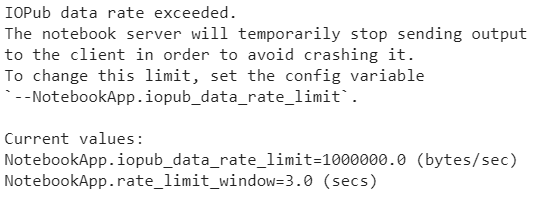